# Classifying Handwritten digits of the MNIST dataset using PYTORCH

In [2]:
import torch
import torchvision

In [3]:
from torchvision import transforms,datasets


In [4]:
# reading in the MNIST dataset and creating the train and test datasets

train = datasets.MNIST("",download=True, train = True, transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("",download=True, train = False, transform = transforms.Compose([transforms.ToTensor()]))

In [5]:
train

Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [6]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle = True)

In [7]:
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [8]:
trainset

In [9]:
for data in trainset:
    print(data)
    break


[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [10]:
x, y = data[0][0], data[1][0]
print(x)
print(y)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
data[0][0].shape

torch.Size([1, 28, 28])

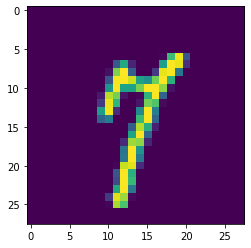

In [13]:
plt.imshow(data[0][0].view(28,28))

In [14]:
count_dict = {x:0 for x in range(10)}

In [15]:
# Counter to count the number of each digits in the training set

total = 0
for data in trainset:
    Xs, ys = data
    for y in ys:
        count_dict[int(y)]+=1
        total +=1

In [16]:
print(count_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [17]:
for i in count_dict:
    print(f'{i} : {count_dict[i]/total*100}')   #Percentage distributions of each digit in training set

0 : 9.871666666666666
1 : 11.236666666666666
2 : 9.93
3 : 10.218333333333334
4 : 9.736666666666666
5 : 9.035
6 : 9.863333333333333
7 : 10.441666666666666
8 : 9.751666666666667
9 : 9.915000000000001


In [18]:
testset

In [19]:
import torch.nn as nn
import torch.nn.functional as F

In [22]:
# BUILDING THE NEURAL NETWORK

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 64)     # 2 HIDDEN LAYERS ARE USED OF 64 UNITS EACH
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.softmax(x, dim=1)
        

    
net = Net()
    

In [23]:
net

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [24]:
X = torch.rand((28,28))

In [25]:
X= X.view(1,28*28)

In [26]:
output = net(X)

In [27]:
output

tensor([[0.0969, 0.1063, 0.1183, 0.0990, 0.1089, 0.0902, 0.0862, 0.0988, 0.0979,
         0.0975]], grad_fn=<SoftmaxBackward>)

In [28]:
import torch.optim as optim

In [29]:
optimizer = optim.Adam(net.parameters(), lr = 0.001)

In [30]:
epochs = 5

for epoch in range(epochs):
    for data in trainset:
            X, y = data
            net.zero_grad()
            output = net(X.view(-1, 28*28))
            loss = F.nll_loss(output, y)
            loss.backward()
            optimizer.step()
    print(loss)

tensor(-0.8001, grad_fn=<NllLossBackward>)
tensor(-0.9794, grad_fn=<NllLossBackward>)
tensor(-1.0000, grad_fn=<NllLossBackward>)
tensor(-1.0000, grad_fn=<NllLossBackward>)
tensor(-1., grad_fn=<NllLossBackward>)


In [31]:
# ALGORITHM TO CALCULATE ACCURATE PREDICTIONS BY THE NEURAL NETWORK

correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))  

Accuracy:  0.948


# THE END